## Part one of the project

* Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. 

## Import Libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [5]:
logins.shape

(93142, 1)

In [6]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins.isna().any()

login_time    False
dtype: bool

In [8]:
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648247
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [9]:
logins['count'] = 1

In [10]:
logins.set_index('login_time', inplace=True)

In [11]:
logins = logins.resample('15min', origin='start').sum()

In [12]:
logins

,count
login_time,
1970-01-01 20:12:16,8
1970-01-01 20:27:16,8
1970-01-01 20:42:16,6
1970-01-01 20:57:16,3
1970-01-01 21:12:16,3
...,...
1970-04-13 17:57:16,4
1970-04-13 18:12:16,4
1970-04-13 18:27:16,5


In [13]:
df = logins

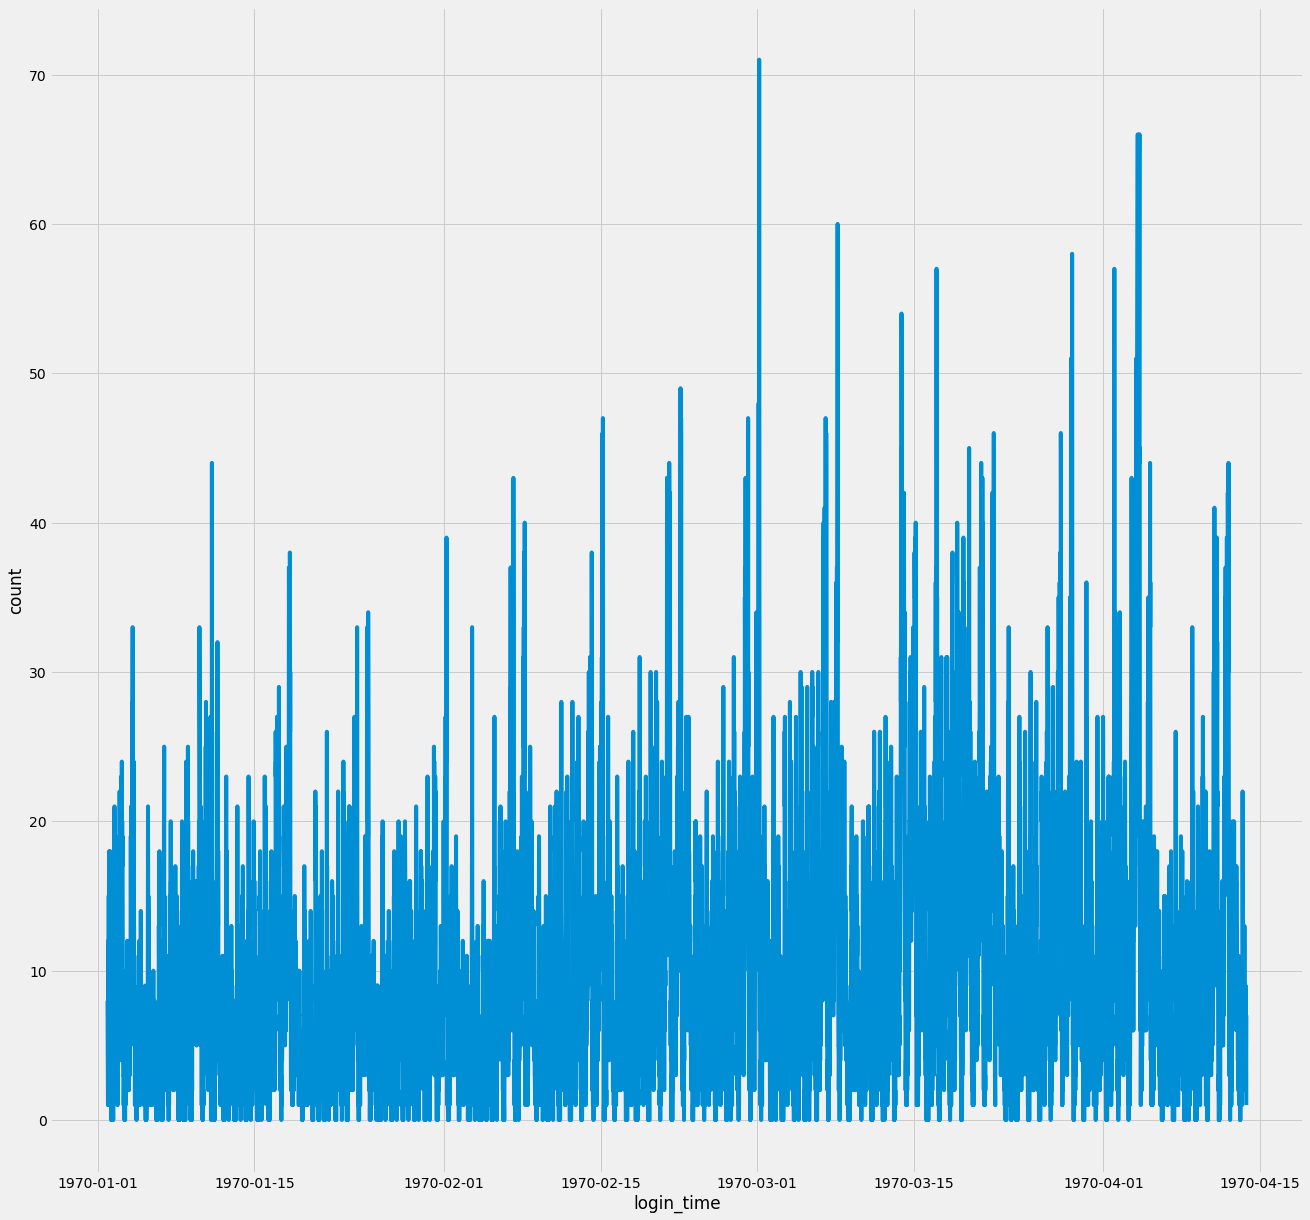

In [14]:
plt.figure(figsize=(20,20))
sns.lineplot(x=df.index, y='count', data=df)
plt.show()

In [15]:
jan = df.loc['1970-01']
feb = df.loc['1970-02']
mar = df.loc['1970-03']
apr = df.loc['1970-04']

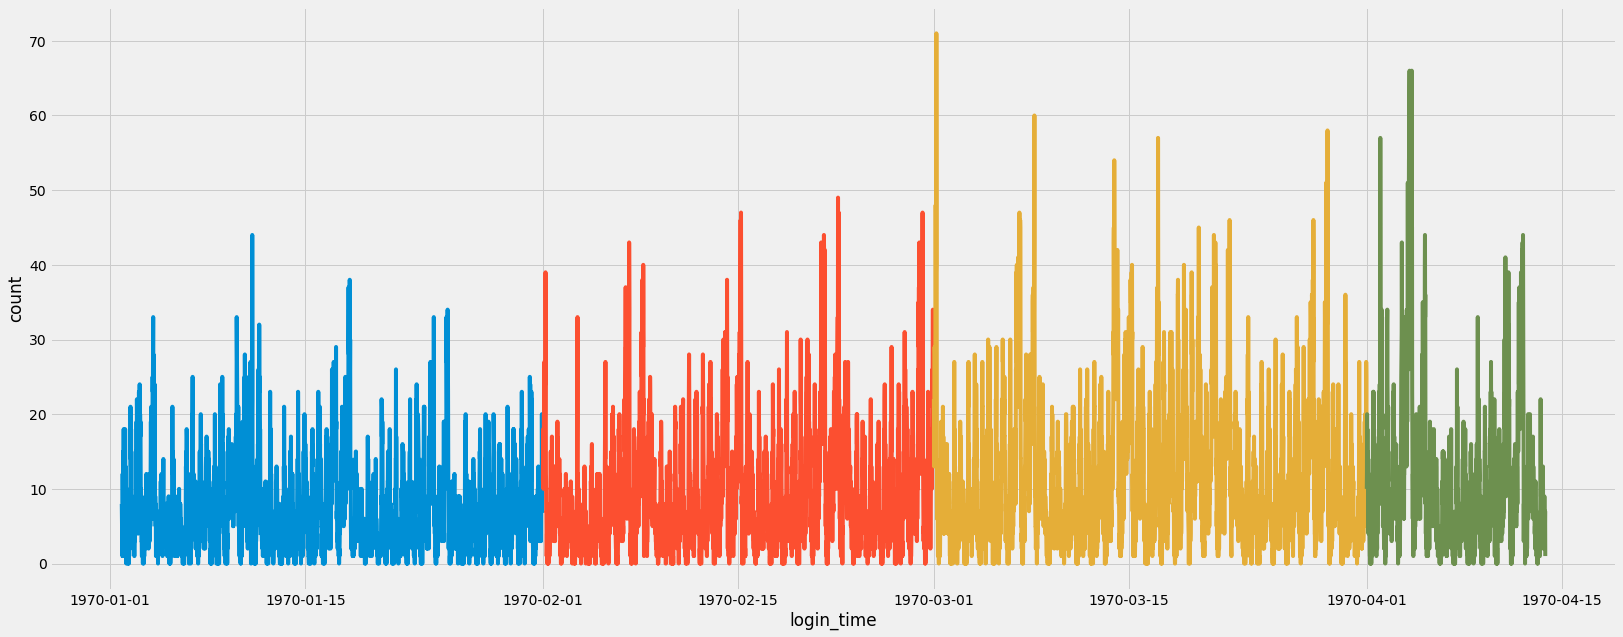

In [16]:
plt.figure(figsize=(25,10))
sns.lineplot(x=jan.index, y='count', data=jan)
sns.lineplot(x=feb.index, y='count', data=feb)
sns.lineplot(x=mar.index, y='count', data=mar)
sns.lineplot(x=apr.index, y='count', data=apr)
plt.show()

There were spikes in activity in first few days of march and april. Activity looks almost the same in both january and february. 

In [17]:
df_month = df.resample('M').sum()
df_month = df_month.sort_values(by='count', ascending=False)
df_month

,count
login_time,
1970-03-31,33725
1970-02-28,24674
1970-01-31,21250
1970-04-30,13493


## Do more logins occur in one month over the other?

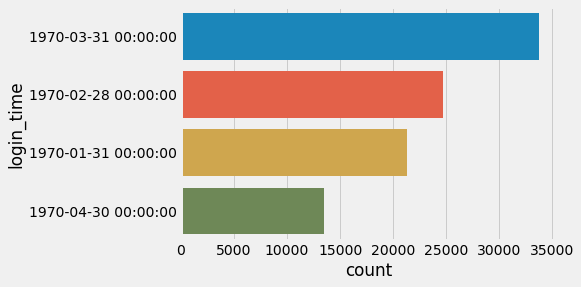

In [18]:
sns.barplot(x='count', y=df_month.index, data=df_month)
plt.show()

The month of March exprienced the most logins while April had the least 

## What about the week? How do weekends and weekdays differ?

In [19]:
weeks = df.resample('W').sum()

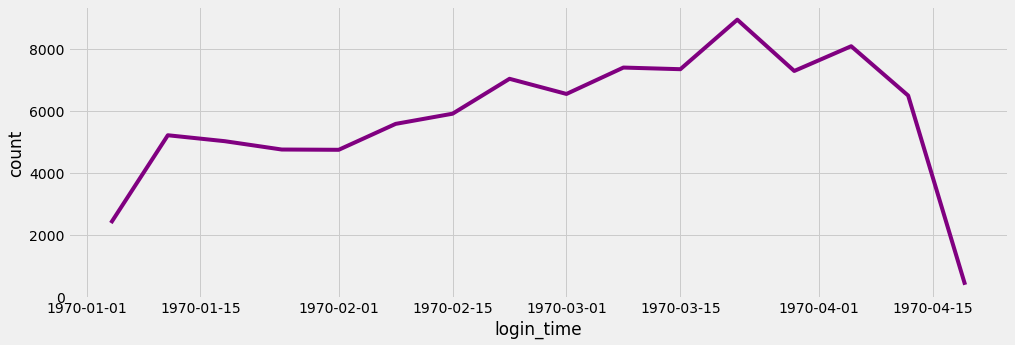

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(x=weeks.index, y='count', data=weeks, color='purple')
plt.show()

There is a continuous rise in weekly logins until the logins get to April, where there is a sharp decline in activity

In [21]:
weekday = df.groupby(df.index.dayofweek).mean()
weekday

,count
login_time,
0,6.222535
1,6.907738
2,7.726190
3,8.811029
4,10.587500
5,13.435417
6,12.543056


In [22]:
weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

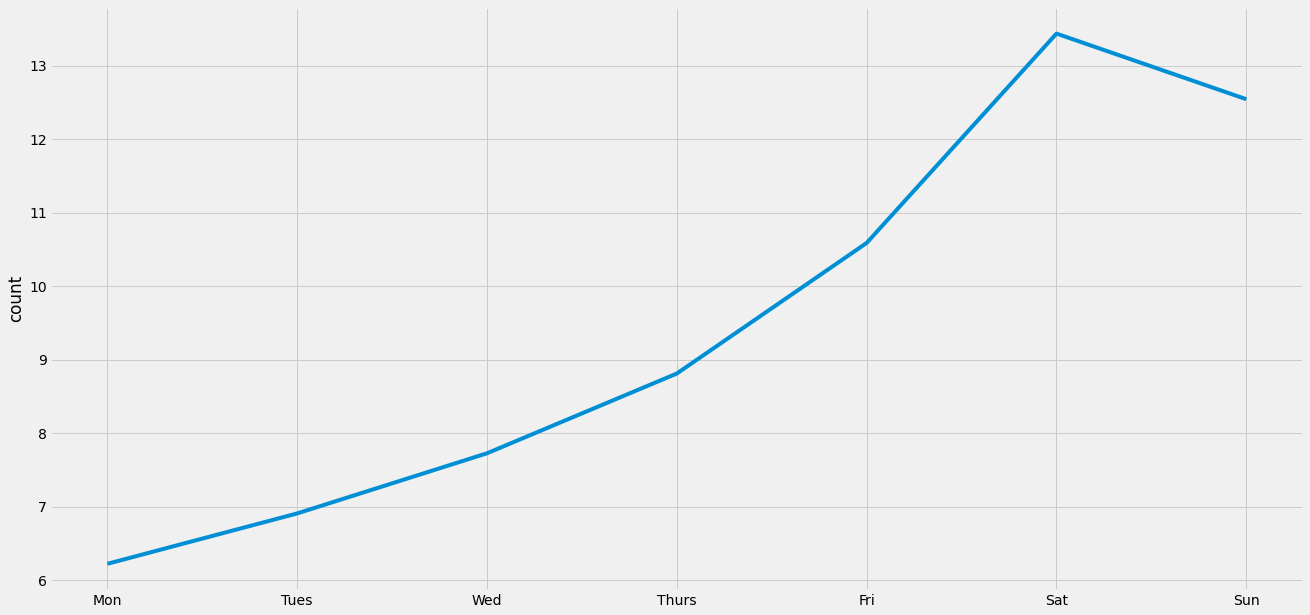

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x=weekday.index, y='count', data=weekday)
plt.show()

Average logins appear to rise gradually to a peak on saturdays. There's a lot of login activity on weekends compared to weekdays.

## What times of the day has the most logins 

In [34]:
weekend = np.where(df.index.weekday < 5, 'weekday', 'weekend')
df_time = df.groupby([weekend, df.index.time]).mean()
df_time

count
weekday 00:12:16  12.875000
        00:27:16  12.347222
        00:42:16  11.972222
        00:57:16  12.763889
        01:12:16  12.944444
...                     ...
weekend 22:57:16  13.366667
        23:12:16  12.866667
        23:27:16  12.800000
        23:42:16  13.533333
        23:57:16  12.800000

[192 rows x 1 columns]

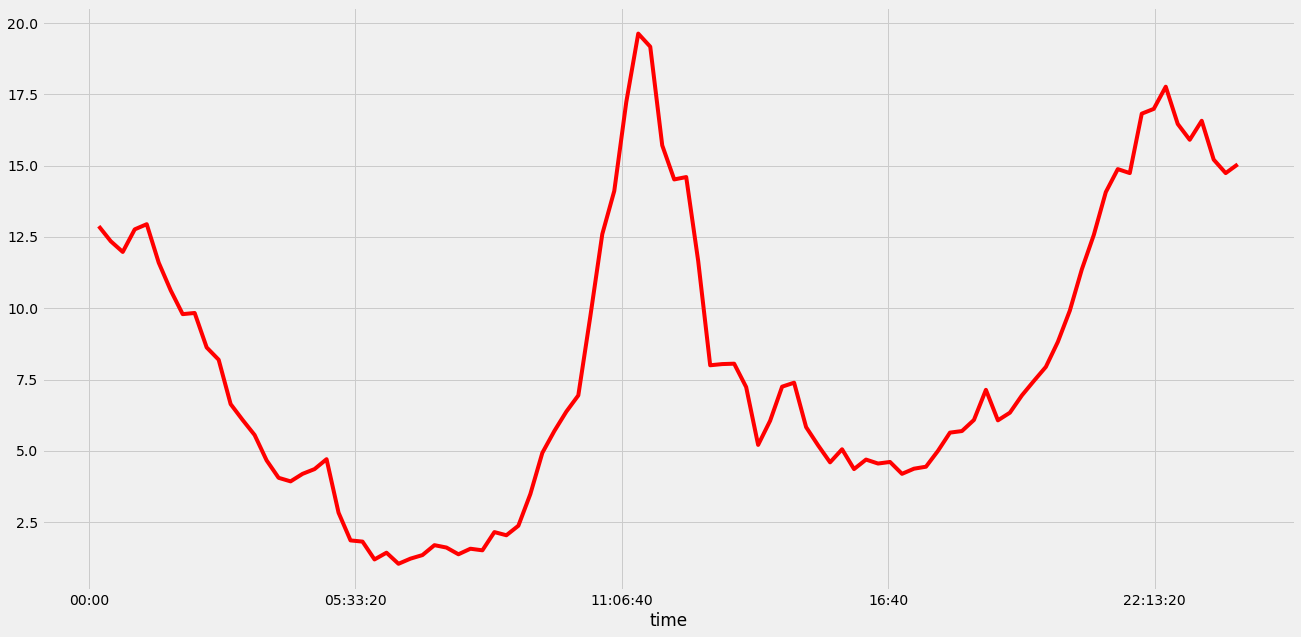

In [46]:

df_time.loc['weekday'].plot(figsize=(20,10), legend=False, color='red')
plt.show()

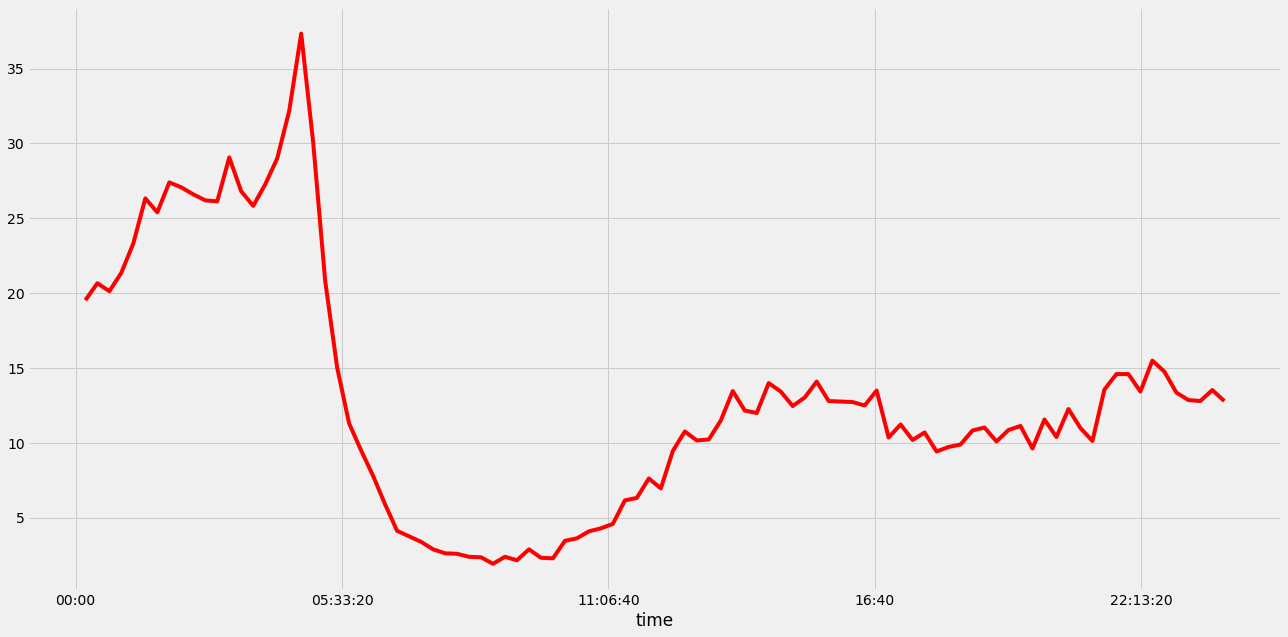

In [47]:
df_time.loc['weekend'].plot(figsize=(20,10), legend=False, color='red')
plt.show()

logins differ substantially between weekends and weekdays. logins peak at around 11am on weekdays while logins peak at around 5:30am on weekends